# First steps with `apollinaire`

Let's assume that you want to use *apollinaire* to fit p-mode parameters for
a given star. First we need to import the package :

In [1]:
import apollinaire as apn
%matplotlib inline

The name of the stars we are going to work with is KIC6603624, also known as Saxo. The package include a version of the lightcurves calibrated following the KEPSEISMIC method (see García et al. 2014). 

Text(0, 0.5, 'Luminosity variation (ppm)')

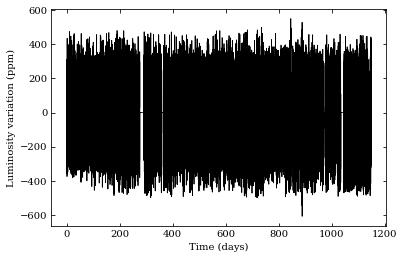

In [2]:
from astropy.io import fits
from os import path
import numpy as np
import matplotlib.pyplot as plt

modDir = path.abspath ('..')
filename = path.join (modDir, 'timeseries/kplr006603624_52_COR_filt_inp.fits')
hdu = fits.open (filename) [0]
data = np.array (hdu.data)
t = data[:,0]
v = data[:,1]

fig, ax = plt.subplots ()
ax.plot (t-t[0], v, color='black')

ax.set_xlabel ('Time (days)')
ax.set_ylabel ('Luminosity variation (ppm)')

Let's compute the psd of this lightcurve with the dedicated function:

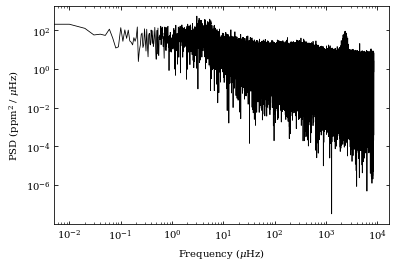

In [3]:
dt = np.median (t[1:] - t[:-1]) * 86400
freq, psd = apn.psd.series_to_psd (v, dt=dt, correct_dc=True)
freq = freq*1e6
psd = psd*1e-6

fig, ax = plt.subplots ()
ax.plot (freq, psd, color='black')
ax.set_xlabel (r'Frequency ($\mu$Hz)')
ax.set_ylabel (r'PSD (ppm$^2$ / $\mu$Hz)')
ax.set_yscale ('log')
ax.set_xscale ('log')

Here are the p-modes we want to fit :

Text(0, 0.5, 'PSD (ppm$^2$ / $\\mu$Hz)')

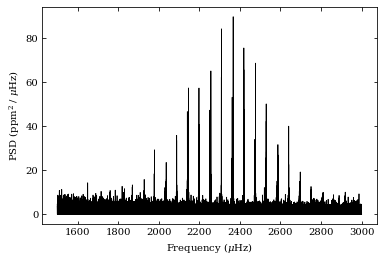

In [4]:
fig, ax = plt.subplots ()
cond = (freq>1500.)&(freq<3000.)
ax.plot (freq[cond], psd[cond], color='black')
ax.set_xlabel (r'Frequency ($\mu$Hz)')
ax.set_ylabel (r'PSD (ppm$^2$ / $\mu$Hz)')

We can also take a look at the echelle diagram of the modes. For this purpose, we have to compute $\Delta\nu$, the large separation, through the scaling law, knowing mass and radius of the star. Mass and radius values are taken from the DR25 *Kepler* catalog (see Mathur et al. 2017).

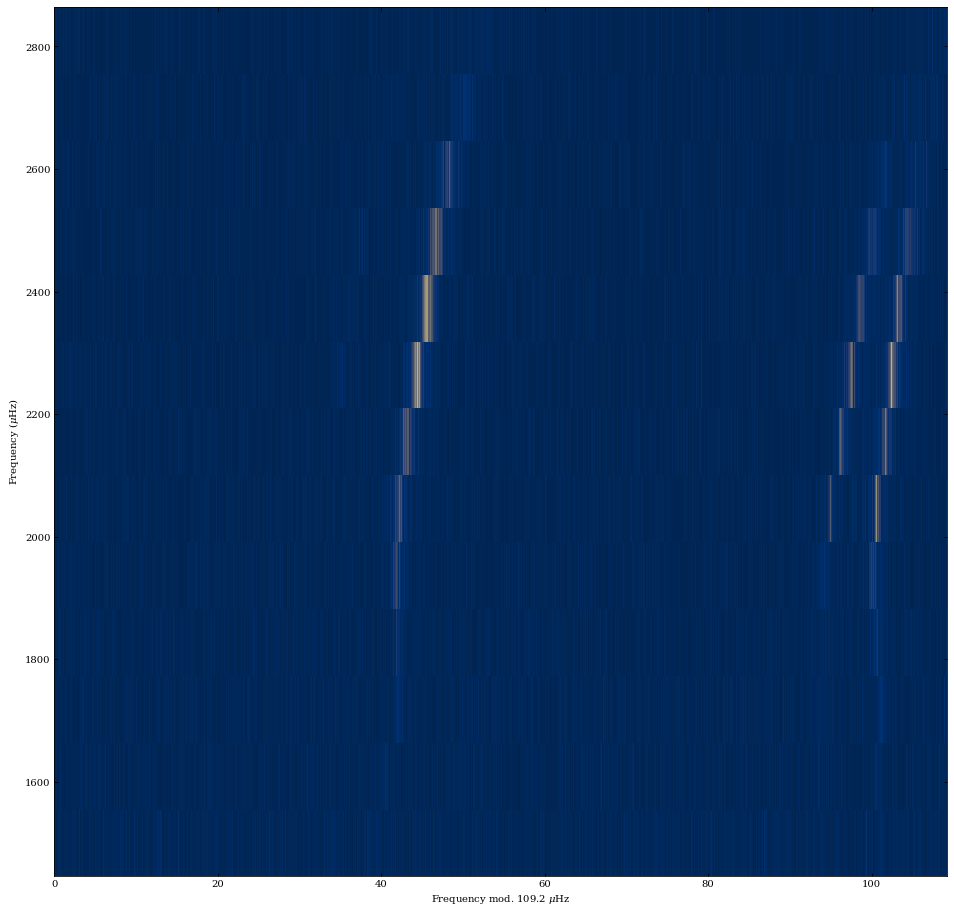

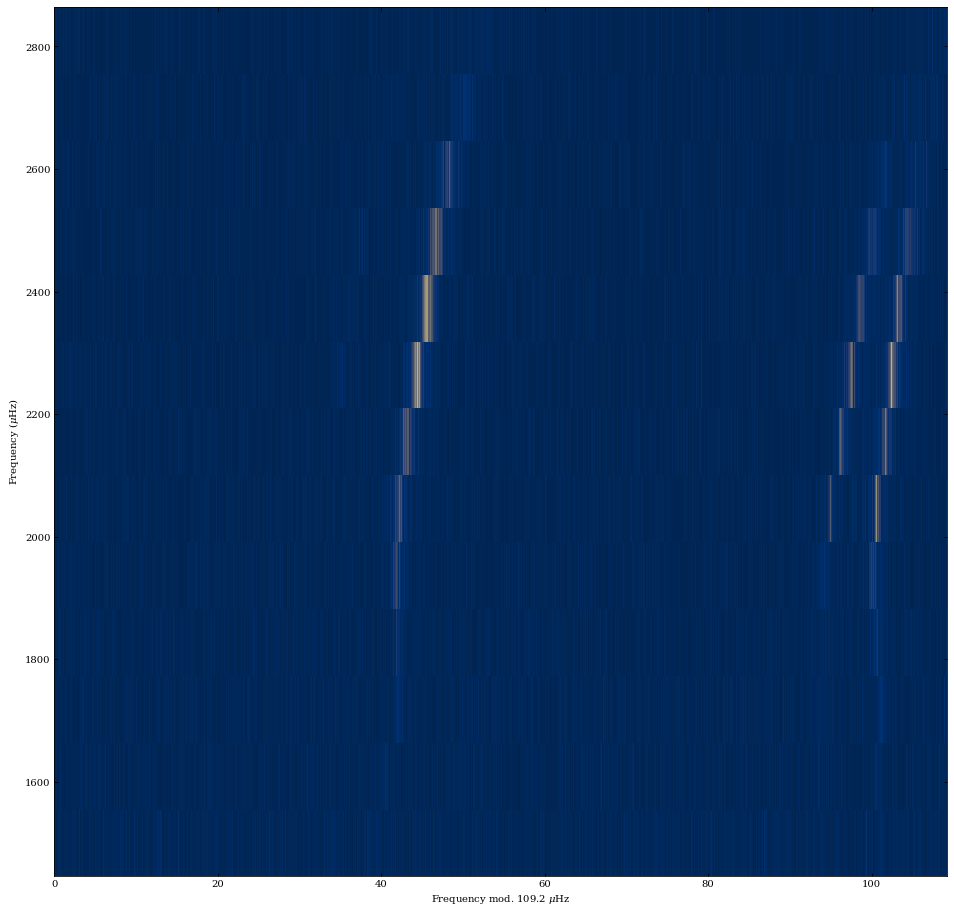

In [5]:
r = 1.162
m = 1.027
dnu_sun = 135.
dnu = dnu_sun * np.power (m, 0.5) * np.power (r, -1.5)
apn.psd.echelle_diagram (freq[cond], psd[cond], dnu, smooth=10)

The main peakbagging tool provided by *apollinaire* is the `stellar_framework` function. It will successively fit the background of the star, the global pattern of the p-modes, and finally the individual parameters of the modes. Radius, mass and effective temperature are needed as input. 

In [6]:

teff = 5671
apn.peakbagging.stellar_framework (freq, psd, r, m, teff, n_harvey=2, low_cut=50., filename_back='background',
                                   filemcmc_back=None, nsteps_mcmc_back=2000, n_order=3, n_order_peakbagging=5, 
                                   filename_pattern='pattern', fit_l3=True,
                                   filemcmc_pattern=None, nsteps_mcmc_pattern=2000, parallelise=True, 
                                   quickfit=True, num=500, coeff_discard_pkb=5,
                                   progress=True, a2z_file='modes_param.a2z', 
                                   nsteps_mcmc_peakbagging=2000, filename_peakbagging='summary_peakbagging.pdf')

Dnu computed with scale law: 109.22191787013068
numax computed with scale law: 2340.0013597293523
Beginning fit
Optimization terminated successfully.


/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/background.py:655: OptimizeWarning: Unknown solver options: jac, hess, hessp, constraints
  result = minimize (log_likelihood_back, param,


Beginning fit


100%|██████████| 2000/2000 [01:32<00:00, 21.66it/s]


Guess
      eps  alpha         Dnu       numax       Hmax        Wenv       w  d02  \
0  1.5974   0.25  109.221918  2340.00136  26.611519  322.755031  1.8602  9.0   

        b02   d01  b01       d13  b03  
0 -0.159899  3.25 -0.1  4.368877  0.0  


/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/global_pattern.py:729: OptimizeWarning: Unknown solver options: jac, hess, hessp, constraints
  result = minimize (log_likelihood_pattern, param,


Optimization terminated successfully.
Fitted parameters
        eps     alpha        Dnu        numax      Hmax        Wenv         w  \
0  1.672133  0.499939  109.22028  2316.601412  5.812141  387.304022  2.052902   

        d02       b02       d01       b01       d13       b03  
0  5.469792 -0.499934  2.776683 -0.499934  8.737705 -0.099936  
Guess
        eps     alpha        Dnu        numax      Hmax        Wenv         w  \
0  1.672133  0.499939  109.22028  2316.601412  5.812141  387.304022  2.052902   

        d02       b02       d01       b01       d13       b03  
0  5.469792 -0.499934  2.776683 -0.499934  8.737705 -0.099936  
Beginning fit


  0%|          | 0/2000 [00:00<?, ?it/s]/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 2000/2000 [03:50<00:00,  8.69it/s]


Fitted parameters
        eps     alpha        Dnu        numax      Hmax        Wenv         w  \
0  1.504606  0.043724  110.07225  2383.557125  7.837297  256.116893  1.548928   

        d02       b02       d01       b01       d13       b03  
0  5.051802 -0.316322  2.709646 -0.319358  9.532294 -0.333289  
Orders to fit
[18 19 20 21 22]
Fitting on order 18
Window width 96.14679373559738 muHz
Chain will be saved at: ./mcmc_sampler_order_18.h5


100%|██████████| 2000/2000 [04:18<00:00,  7.73it/s]


Ensemble sampling achieved
Fitting on order 19
Window width 96.15185362960847 muHz
Chain will be saved at: ./mcmc_sampler_order_19.h5


100%|██████████| 2000/2000 [04:18<00:00,  7.75it/s]


Ensemble sampling achieved
Fitting on order 20
Window width 96.15691352361637 muHz
Chain will be saved at: ./mcmc_sampler_order_20.h5


100%|██████████| 2000/2000 [04:16<00:00,  7.78it/s]


Ensemble sampling achieved
Fitting on order 21
Window width 96.161973417627 muHz
Chain will be saved at: ./mcmc_sampler_order_21.h5


100%|██████████| 2000/2000 [04:17<00:00,  7.76it/s]


Ensemble sampling achieved
Fitting on order 22
Window width 96.16703331163762 muHz
Chain will be saved at: ./mcmc_sampler_order_22.h5


100%|██████████| 2000/2000 [04:18<00:00,  7.75it/s]


Ensemble sampling achieved
